In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [14]:
X_test = pd.read_csv('X_test_GgyECq8.csv')
X_train = pd.read_csv('X_train_Wwou3IE.csv')
y_train = pd.read_csv('y_train_jJtXgMX.csv')
y_pred = pd.read_csv('y_random_pt8afo8.csv')

In [15]:
X_train.shape

(10605, 10)

In [16]:
X_train.columns

Index(['DELIVERY_START', 'load_forecast', 'coal_power_available',
       'gas_power_available', 'nucelear_power_available',
       'wind_power_forecasts_average', 'solar_power_forecasts_average',
       'wind_power_forecasts_std', 'solar_power_forecasts_std',
       'predicted_spot_price'],
      dtype='object')

In [17]:
y_train.columns

Index(['DELIVERY_START', 'spot_id_delta'], dtype='object')

In [18]:
round(X_train.isna().sum()/X_train.shape[0]*100,2)

DELIVERY_START                    0.00
load_forecast                    12.14
coal_power_available              0.01
gas_power_available               0.01
nucelear_power_available          0.01
wind_power_forecasts_average      0.23
solar_power_forecasts_average     0.23
wind_power_forecasts_std          0.23
solar_power_forecasts_std         0.23
predicted_spot_price             82.59
dtype: float64

In [19]:
round(X_test.isna().sum()/X_test.shape[0]*100,2)

DELIVERY_START                    0.00
load_forecast                     0.00
coal_power_available              0.00
gas_power_available               0.00
nucelear_power_available          0.00
wind_power_forecasts_average      0.00
solar_power_forecasts_average     0.49
wind_power_forecasts_std          0.00
solar_power_forecasts_std         0.49
predicted_spot_price             31.08
dtype: float64

In [20]:
def preprocess_data(df):
    # Ensure 'DELIVERY_START' is set as the index with timezone handling
    if 'DELIVERY_START' in df.columns:
        df['DELIVERY_START'] = pd.to_datetime(df['DELIVERY_START'], utc=True)  # Parse with timezone info
        df = df.set_index('DELIVERY_START')
        df.index = df.index.tz_convert('Europe/Berlin')  # Adjust to desired timezone, if needed

    # Add time-related features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month

    # Handle missing values by filling with the mean of each column
    df = df.fillna(df.mean())

    df = pd.get_dummies(df, drop_first=True)  # Encode categorical variables

    # Drop unwanted columns
    df = df.drop(columns=['predicted_spot_price'], errors='ignore')

    df['delta_load'] = df['load_forecast'] - (df['coal_power_available']+df['gas_power_available']+
                                              df['nucelear_power_available']+df['wind_power_forecasts_average']+
                                              df['solar_power_forecasts_average'])

    df['delta_load_wo_renewables'] = df['load_forecast'] - (df['coal_power_available']+df['gas_power_available']+
                                              df['nucelear_power_available'])
    
    df['renewables_share'] = (df['wind_power_forecasts_average']+df['solar_power_forecasts_average']) / (df['coal_power_available']+df['gas_power_available']+
                                              df['nucelear_power_available']+df['wind_power_forecasts_average']+
                                              df['solar_power_forecasts_average'])
        
    df['wind_share'] = df['wind_power_forecasts_average'] / (df['coal_power_available']+df['gas_power_available']+
                                              df['nucelear_power_available']+df['wind_power_forecasts_average']+
                                              df['solar_power_forecasts_average'])
    
    df['facteur_de_charge'] = (df['coal_power_available'] + df['gas_power_available'] + 
                               df['nucelear_power_available'] + df['wind_power_forecasts_average'] + 
                               df['solar_power_forecasts_average']) / (df['coal_power_available'].max() + 
                                                                        df['gas_power_available'].max() + 
                                                                        df['nucelear_power_available'].max() + 
                                                                        df['wind_power_forecasts_average'].max() + 
                                                                        df['solar_power_forecasts_average'].max())

    df['cyclicite_demand'] = df['load_forecast'] * np.sin(242 * np.pi * df['hour'] / 24)

    return df

c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


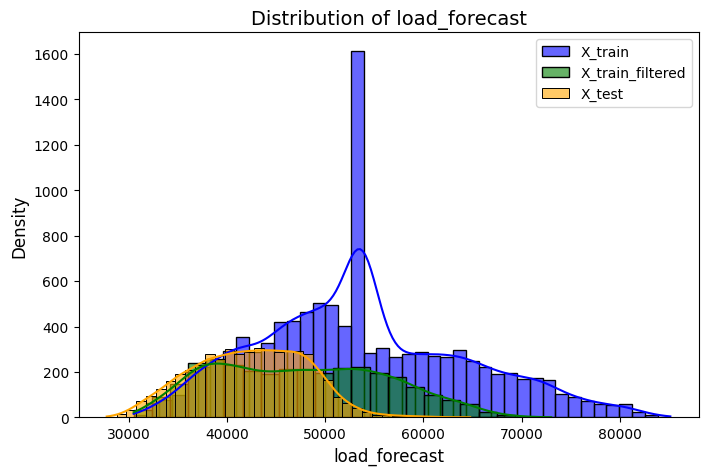

c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


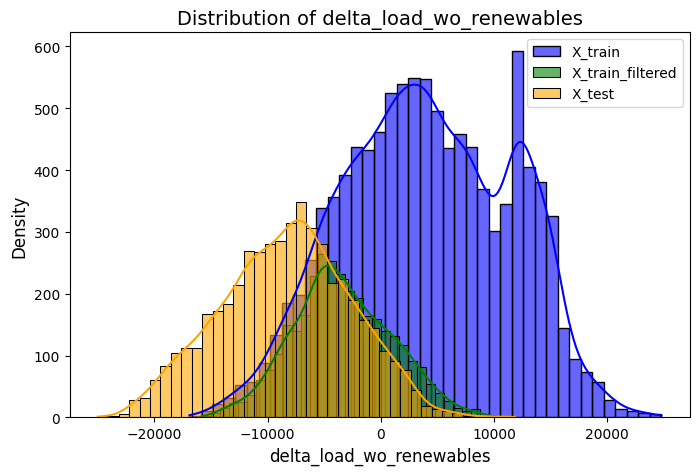

c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ilyes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


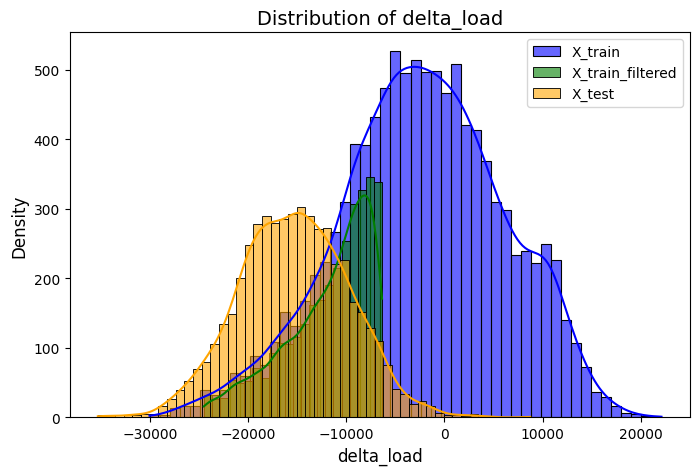

In [21]:
# Plot distributions of all variables
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)
X_train_filtered = X_train.copy()
for column in ['delta_load']:
    lower_bound = X_test[column].quantile(0.05)
    upper_bound = X_test[column].quantile(0.95)
    X_train_filtered = X_train_filtered[(X_train_filtered[column] >= lower_bound) & (X_train_filtered[column] <= upper_bound)]

for column in ['load_forecast', 'delta_load_wo_renewables', 'delta_load']:
    plt.figure(figsize=(8, 5))
    sns.histplot(X_train[column], color='blue', label='X_train', kde=True, alpha=0.6)
    sns.histplot(X_train_filtered[column], color='green', label='X_train_filtered', kde=True, alpha=0.6)
    sns.histplot(X_test[column], color='orange', label='X_test', kde=True, alpha=0.6)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()